In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [3]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')

In [4]:
df.shape

(729322, 11)

In [7]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [8]:
non_num_cols=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(df[non_num_cols].count())

id                    729322
pickup_datetime       729322
dropoff_datetime      729322
store_and_fwd_flag    729322
dtype: int64


In [9]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

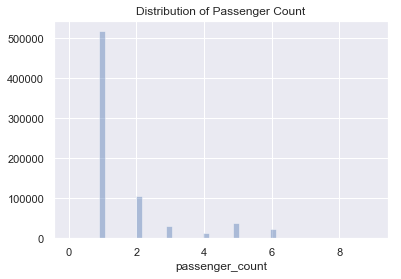

In [10]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In [11]:
df['pickup_datetime'].nunique()
df['dropoff_datetime'].nunique()

709308

In [12]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [13]:
df['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

In [14]:
df['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64

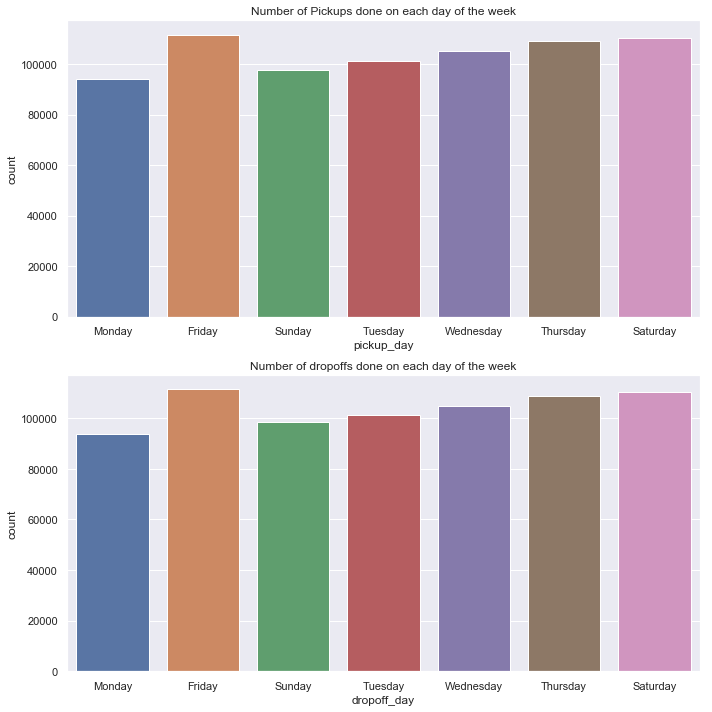

In [15]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [16]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

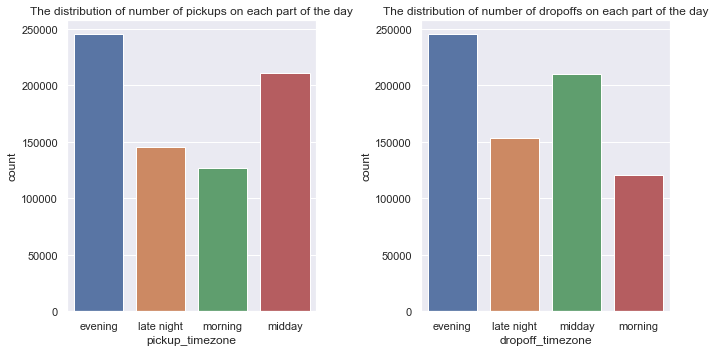

In [17]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

Text(0.5,1,'Distribution of dropoff hours')

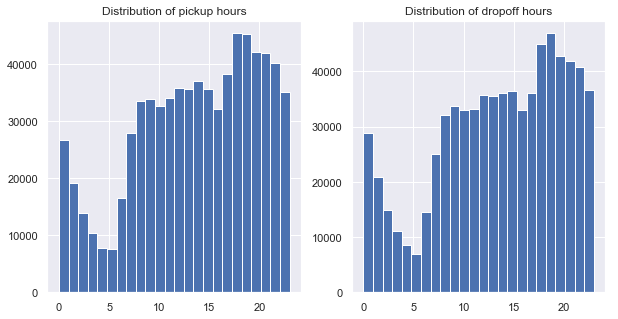

In [18]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

In [19]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

Text(0.5,1,'The distribution of of the Pick Up  Duration distribution')

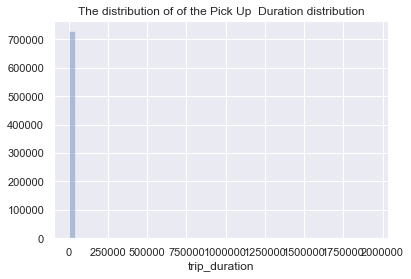

In [20]:
sns.distplot(df['trip_duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

Text(0.5,1,'A boxplot depicting the pickup duration distribution')

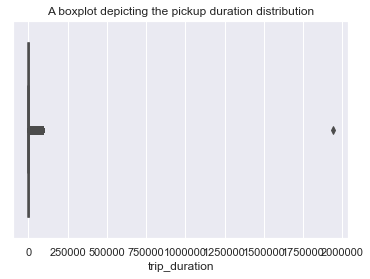

In [21]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

In [22]:
print( df['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


In [23]:
df=df[df.trip_duration!=df.trip_duration.max()]

Text(0.5,1,'Distribution of the pickup ditribution after the treatment of outliers')

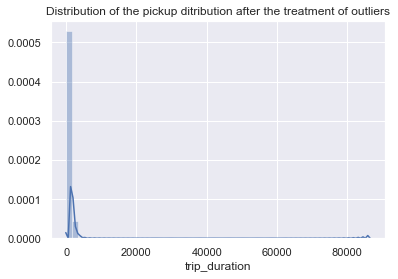

In [24]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

In [25]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

Text(0.5,1,'The distribution of Pick up Longitude')

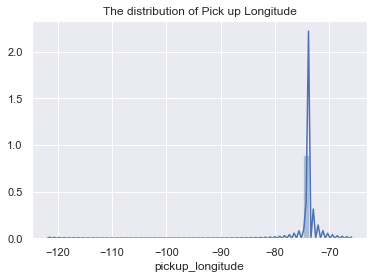

In [26]:
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

Text(0.5,1,'The distribution of Drop off Longitude')

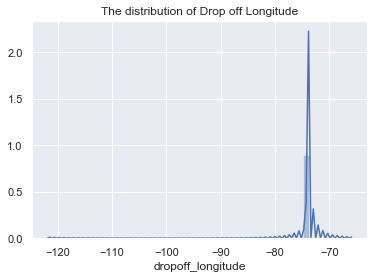

In [27]:
sns.distplot(df["dropoff_longitude"])
plt.title("The distribution of Drop off Longitude")

Text(0.5,1,'The distribution of drop off Latitude')

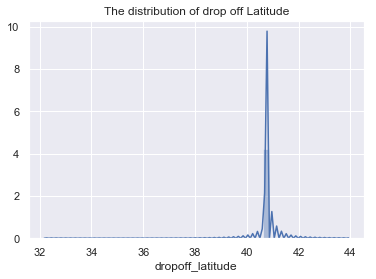

In [28]:
sns.distplot(df['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

Text(0.5,1,'The distribution of pick up Latitude')

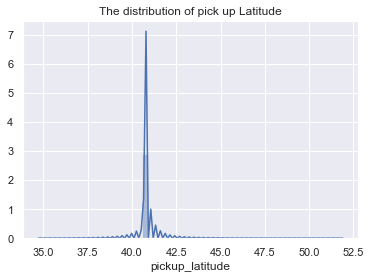

In [29]:
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

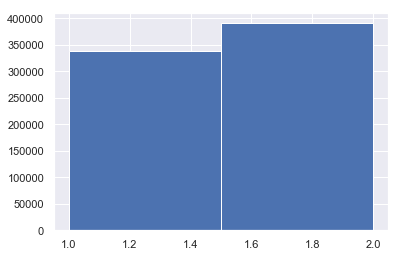

In [30]:
df['vendor_id'].hist(bins=2)

Text(0.5,1,'The Average Trip Duration per Dropoff Day of the week')

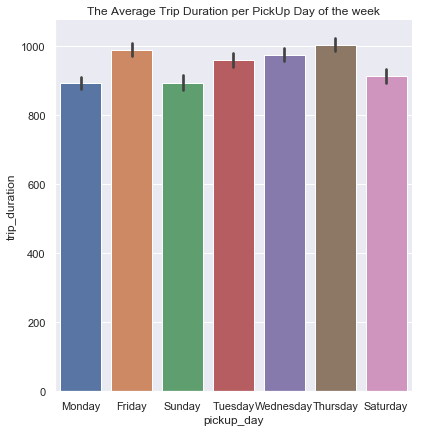

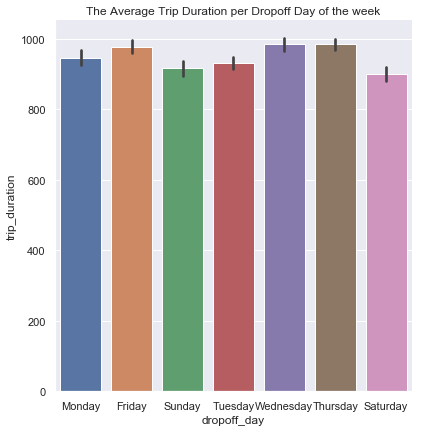

In [31]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

Text(0.5,1,'The Distribution of percentage of different duration of trips')

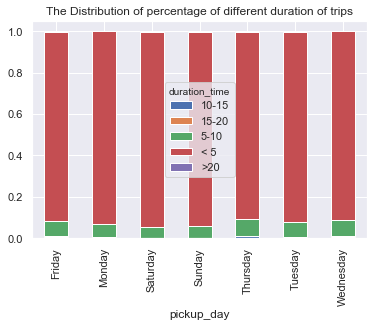

In [32]:
ax1=df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

Text(0.5,1,'A compared distribution of trips > 5 hours')

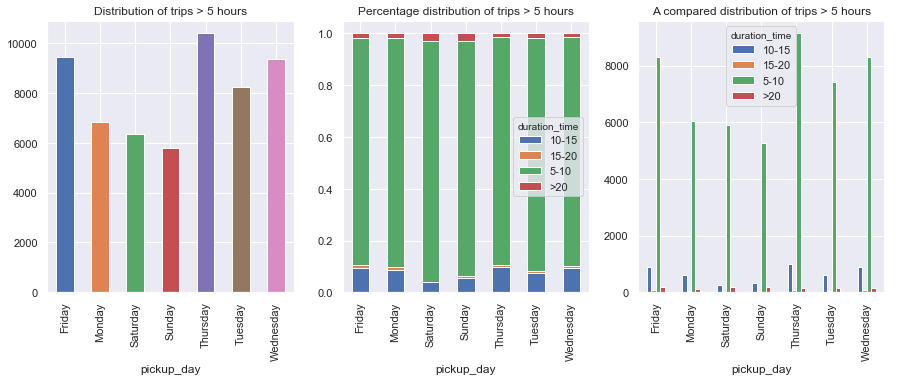

In [33]:
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')
ax2=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')
ax3=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

C:\Users\boss\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\boss\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


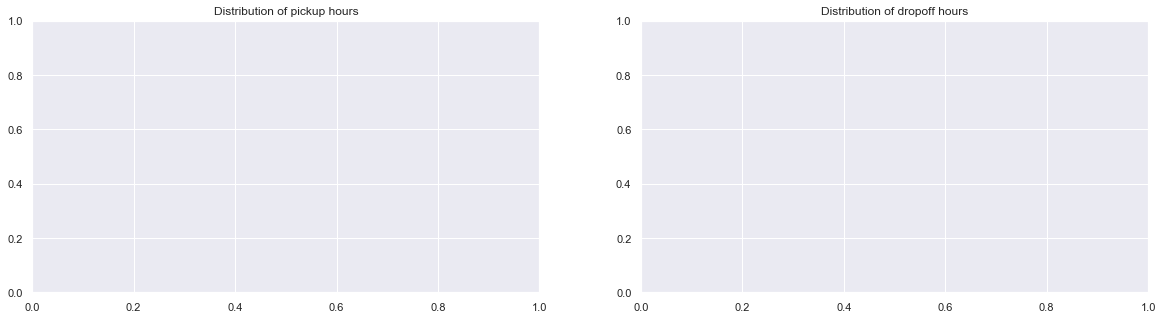

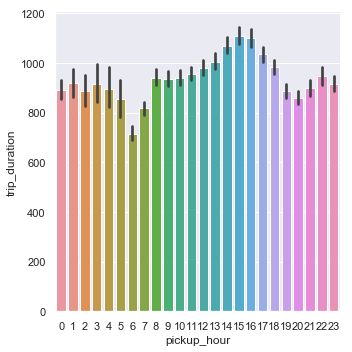

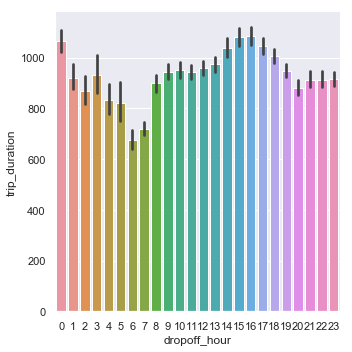

In [34]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Distribution of pickup hours')
ax=sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=df,ax=ax1)
ax2.set_title('Distribution of dropoff hours')
ax=sns.catplot(x="dropoff_hour", y="trip_duration",kind="bar",data=df,ax=ax2)
plt.show()

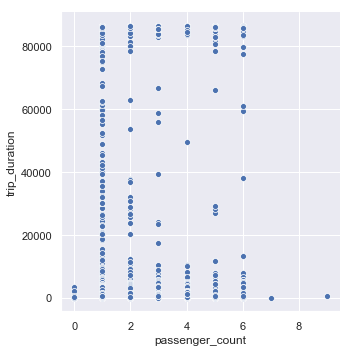

In [35]:
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")

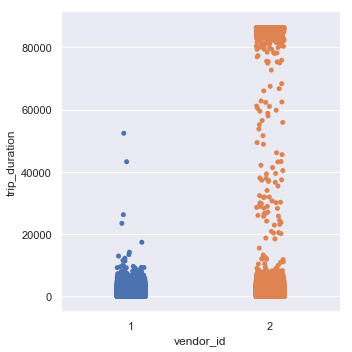

In [36]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

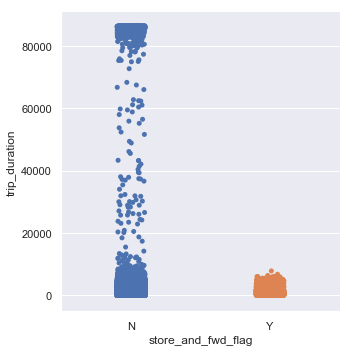

In [37]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

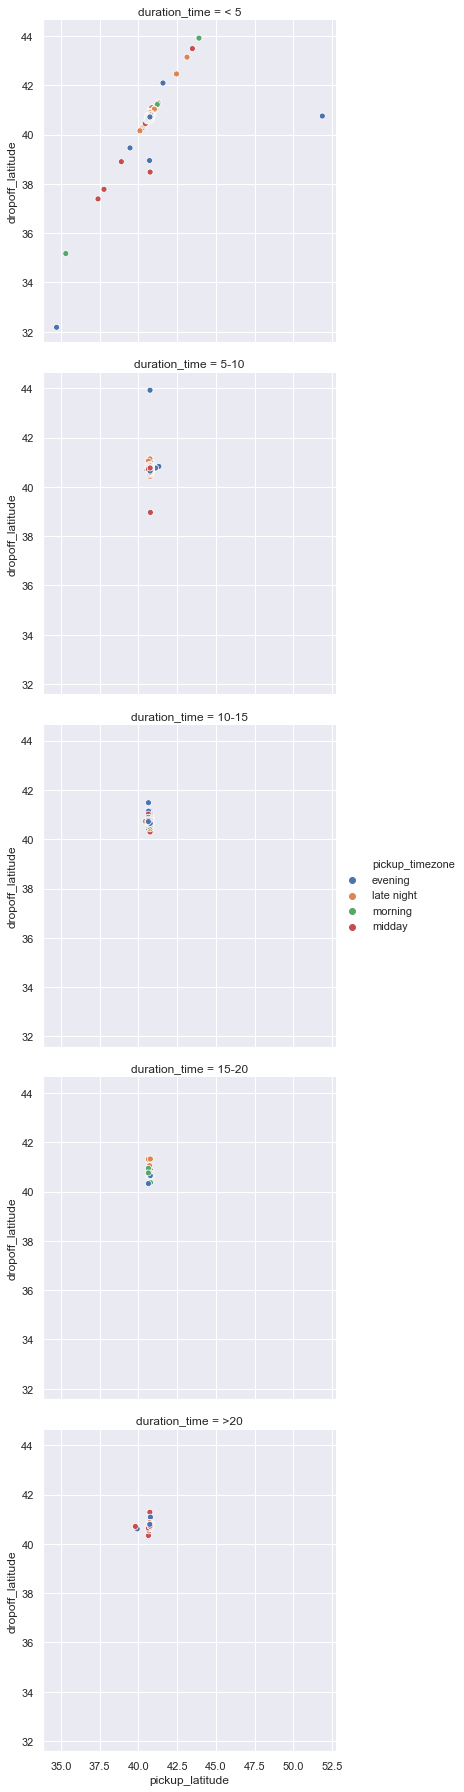

In [38]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=df);

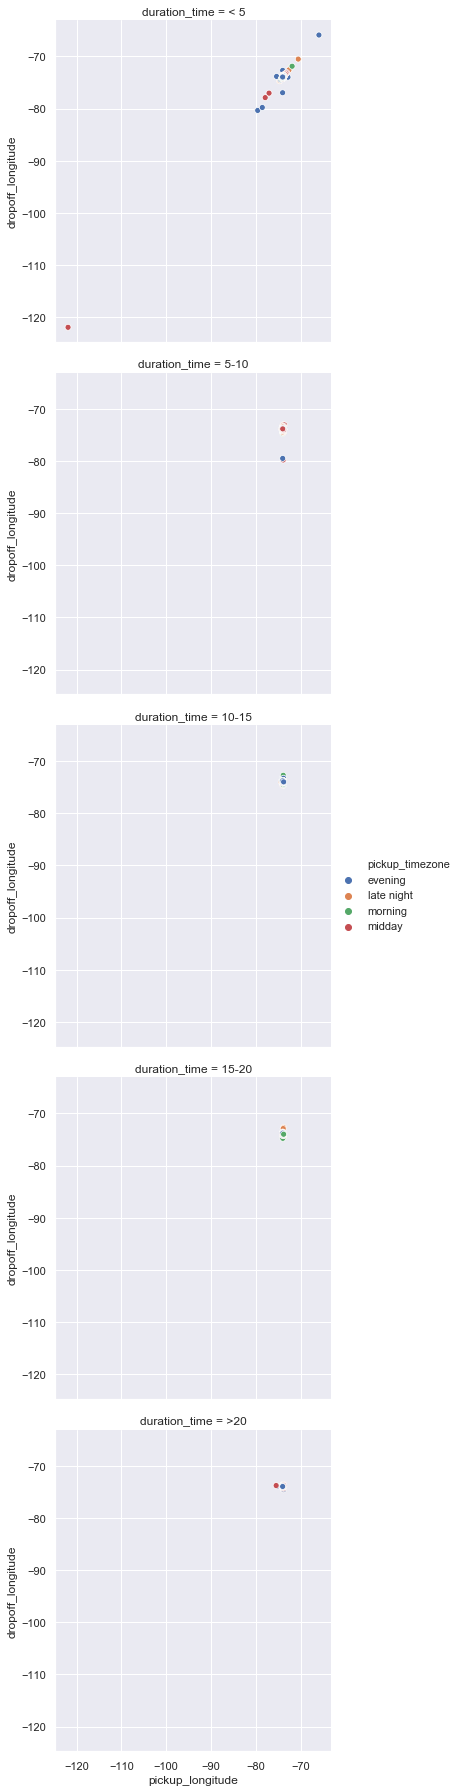

In [39]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_timezone',row='duration_time',data=df);

In [40]:
print('The value of largest 5 trip duration values are as follows : \n {} '.format(df['trip_duration'].nlargest(5)))
print('The the number of rows with 1 as their trip duration values is {}'.format(len(df[df['trip_duration']==1 ])))

The value of largest 5 trip duration values are as follows : 
 259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
Name: trip_duration, dtype: int64 
The the number of rows with 1 as their trip duration values is 13


In [41]:
df=df[df.trip_duration!=df.trip_duration.max()]
df=df[df.trip_duration!=df.trip_duration.min()]

In [42]:
df['trip_duration_hour']=df['trip_duration']/3600 

In [43]:
df.passenger_count.value_counts()

1    517402
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
9         1
7         1
Name: passenger_count, dtype: int64

In [44]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [45]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [46]:
df['pickup_month'].value_counts()

3    128307
4    125627
5    124193
2    119354
6    117404
1    114388
Name: pickup_month, dtype: int64

In [47]:
df['dropoff_month'].value_counts()

3    128275
4    125626
5    124229
2    119351
6    117377
1    114362
7        53
Name: dropoff_month, dtype: int64

In [48]:
print(df[df.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(df[df.dropoff_month==7].pickup_datetime.dt.day.value_counts())

6    53
Name: pickup_datetime, dtype: int64
30    53
Name: pickup_datetime, dtype: int64


In [52]:
#a function is created to calculate the distance from latitudes and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [53]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

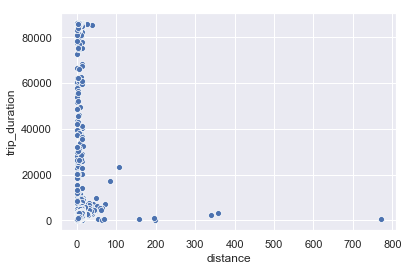

In [54]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

In [55]:
print('The no of rows with distance =0 are {}'.format(len(df[df.distance==0])))

The no of rows with distance =0 are 2889


In [56]:
mean_dist=df['distance'].mean()
df.loc[df['distance']==0,'distance']=mean_dist

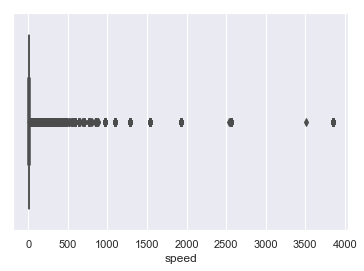

In [57]:
df['speed']=df['distance']/df['trip_duration_hour']
sns.boxplot(df['speed'])

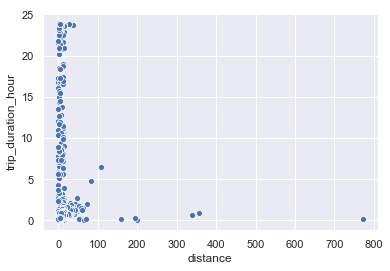

In [58]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

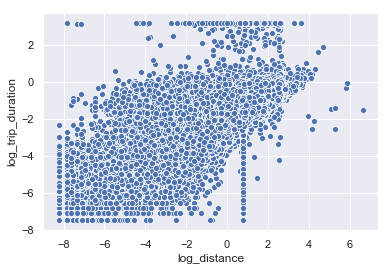

In [59]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [60]:
df=df[df.log_trip_duration<2]

In [61]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'dropoff_hour', 'duration_time',
       'trip_duration_hour', 'pickup_month', 'dropoff_month', 'distance',
       'speed', 'log_distance', 'log_trip_duration'],
      dtype='object')

In [62]:
data2=df.loc[:,['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
   'dropoff_month','pickup_timezone','dropoff_timezone','speed','log_distance','distance']]

In [63]:
data2=pd.get_dummies(data2,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone', 'dropoff_timezone'])

In [64]:
base_line_col=['distance']
predictor_cols=['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y',
               'pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday',
               'pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
               'dropoff_day_Monday','dropoff_day_Saturday','dropoff_day_Sunday','dropoff_day_Thursday',
               'dropoff_day_Tuesday','dropoff_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6',
               'dropoff_month_1','dropoff_month_5','dropoff_month_6','pickup_timezone_late night',
               'pickup_timezone_midday','pickup_timezone_morning','dropoff_timezone_evening',
               'dropoff_timezone_late night','dropoff_timezone_midday','dropoff_timezone_morning']
target_col=['trip_duration']

In [65]:
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
def modelfit(estimator,data_train,data_test,predictors,target):
    #print(data_train.head())
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    train_pred=estimator.predict(data_train[predictors])
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=20,scoring='neg_mean_squared_error')
    
    cv_score=np.sqrt(np.abs(cv_score))
    #Print model report:
    print ("\nModel Report")
    print ("RMSE on Train Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_train.loc[:,target].values, train_pred)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    test_pred=estimator.predict(data_test[predictors])
    print ("RMSE on Test Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_test.loc[:,target].values, test_pred)))
    
    
    
    return test_pred

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
validation_size = 0.20
seed = 7
X_train, X_test = train_test_split(data2,test_size=validation_size, random_state=seed)

In [67]:
mean_pred=np.repeat(X_train[target_col].mean(),len(X_test[target_col]))
from sklearn.metrics import mean_squared_error as mae
sqrt(mae(X_test[target_col],mean_pred))

664.1583834380903

In [68]:
alg1 = LinearRegression(normalize=True)
print('The baseline model')
y_pred=modelfit(alg1, X_train, X_test,base_line_col,target_col)
coef1 = alg1.coef_
print('The coeffient is {}'.format(coef1))

The baseline model

Model Report
RMSE on Train Data: 463
CV Score : Mean - 461.4 | Std - 47.83 | Min - 420.1 | Max - 592.6
RMSE on Test Data: 577.6
The coeffient is [[187.7810396]]



Model Report
RMSE on Train Data: 448.7
CV Score : Mean - 447 | Std - 49.51 | Min - 404.9 | Max - 582.5
RMSE on Test Data: 567.2


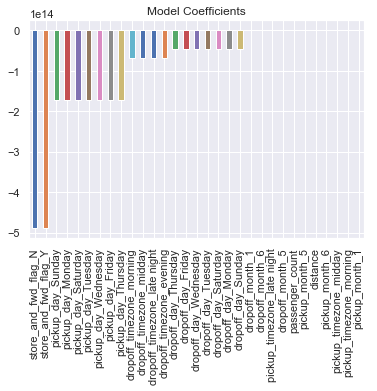

In [69]:
alg2 = LinearRegression(normalize=True)
y_pred=modelfit(alg2, X_train, X_test, predictor_cols,target_col)
coef1 = pd.Series(alg2.coef_[0], predictor_cols).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [79]:
residuals=y_pred-X_test[target_col]Heteroskedasticity 
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,145510)
k = [0 for i in range(0,145510)]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

SyntaxError: invalid syntax (<ipython-input-79-69d01b08b20a>, line 1)